In [12]:
#From: https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [13]:
address = '//prc-cs-f9dkb42/ecozzolino$/Desktop/code/multiTimeline.csv'
df = pd.read_csv(address)
df.head(10)

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43
5,2004-06,64,24,45
6,2004-07,60,23,44
7,2004-08,59,28,44
8,2004-09,53,25,44
9,2004-10,52,24,45


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month                   168 non-null object
diet: (Worldwide)       168 non-null int64
gym: (Worldwide)        168 non-null int64
finance: (Worldwide)    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


In [15]:
#Change the name of the columns to remove whitespace
df.columns = ['month', 'diet', 'gym', 'finance']
df.head(10)
#We can see from above that "Month" is an object - but we want it to be timeseries
#We also want it to be the index of the df

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43
5,2004-06,64,24,45
6,2004-07,60,23,44
7,2004-08,59,28,44
8,2004-09,53,25,44
9,2004-10,52,24,45


In [16]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)
#inplace means you alter the original index and set it to month

In [17]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


Text(0.5,0,'Year')

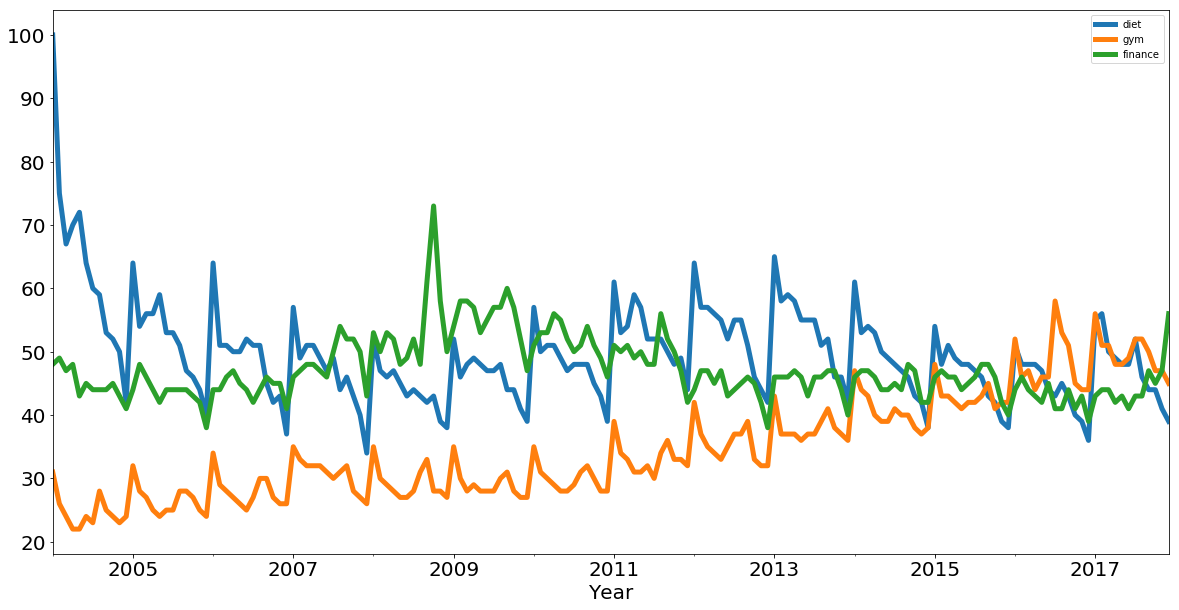

In [18]:
#Start by plotting these trends over time
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
#Interpretation from google trends: y axis = relative popularity compared to highest point
    #for given region and time. 100 = peak popularity, 50=half as popular, 0=LT 1% as popular

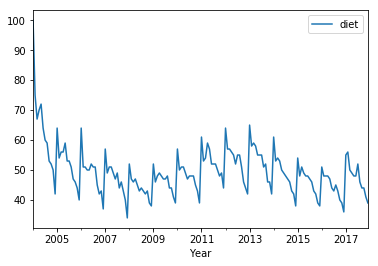

In [22]:
df[['diet']].plot()
plt.xlabel('Year')
plt.show()
#For diet, there's definitely seasonality - highest point is in January, then drops

In [ ]:
'''
IDENTIFYING TRENDS IN TIME SERIES
- take a rolling average (for each point, average the points on either side of it)
- number of points specified by window size, which you choose
- this smooths out noise and seasonality
'''

Text(0.5,0,'Year')

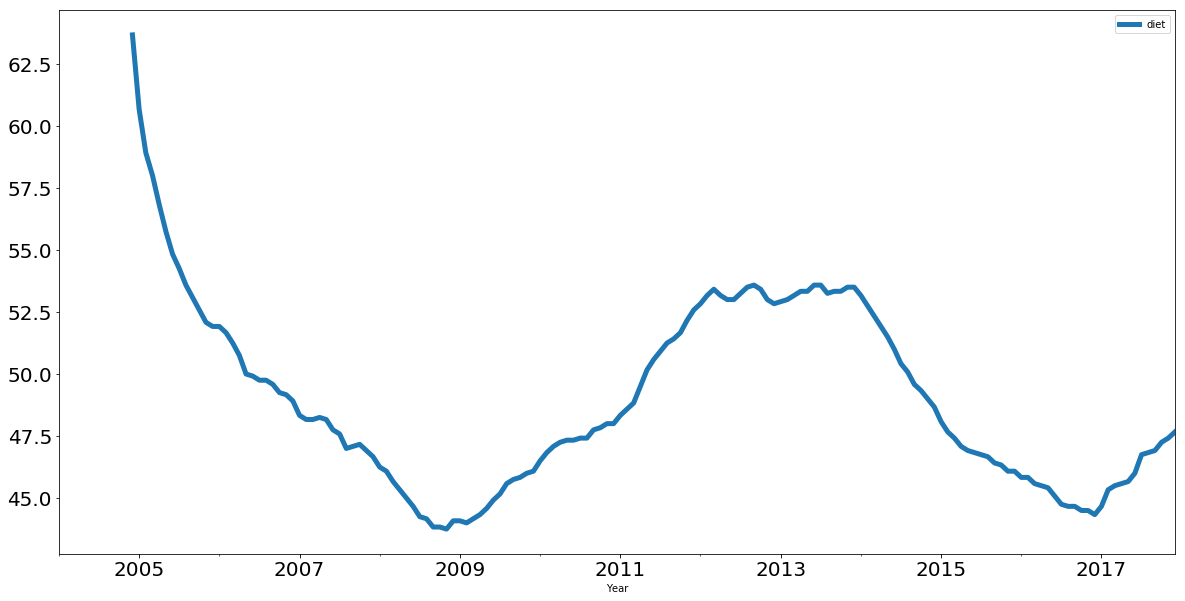

In [23]:
diet = df[['diet']]
#Using [[two brackets]] creates a dataframe, [one bracket] would have created a series
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year')
#Now we can see the overall trend in searching for 'diet'

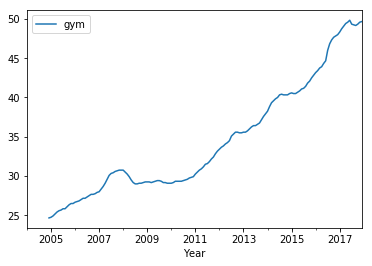

In [25]:
#Replicate for gym
gym = df[['gym']]
gym.rolling(12).mean().plot()
plt.xlabel('Year')
#Here, we can see an upward trend for gym

Text(0.5,0,'Year')

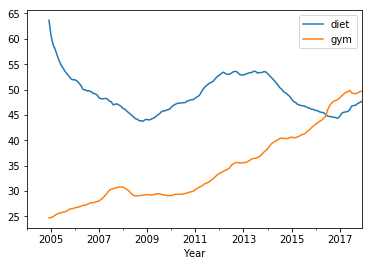

In [26]:
#How to plot them together?
df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
#pd.concat() = takes a list of columns (arg1), concat as columns - axis=1 (arg2)
df_rm.plot()
plt.xlabel('Year')
#Now we can see that gym has surpassed diet in search popularity since ~2016

In [ ]:
'''
SEASONALITY IN TIME-SERIES DATA
- remove trend from the series to let you focus on seasonality
     - "differencing" - look @ difference b/w successive data points
       ->  1st-order differencing: only look at the difference b/w one data point and the one before it
       
- helps turn your ts stationary -> needed for ts forecasting stats methods
'''

Text(0.5,0,'Year')

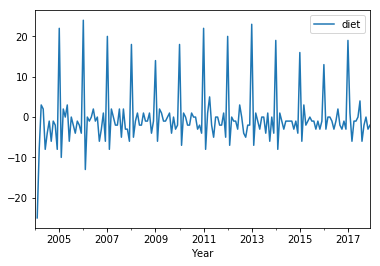

In [27]:
#1st order differencing:
diet.diff().plot()
plt.xlabel('Year')
#Now that we've removed the trend, we can see the spike for 'gym' in january

Text(0.5,0,'Year')

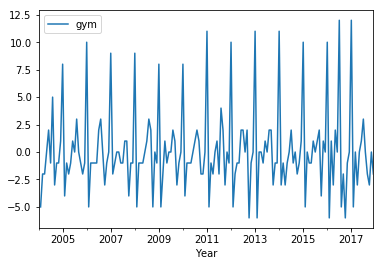

In [28]:
gym.diff().plot()
plt.xlabel('Year')
#It seems like gym, too, has lots of seasonal spiking

In [ ]:
'''
PERIODICITY AND AUTOCORRELATION
- periodic: repeats itself at equally spaced intervals (e.g., 12 mos)
- ts is correlated w/ ITSELF 12 mos ago
    -> if you move 12 mos forward or back, it would map onto itself
    
'''

Text(0.5,0,'Year')

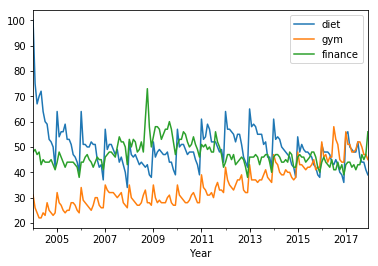

In [29]:
df.plot()
plt.xlabel('Year')

In [30]:
df.corr()
#diet and gym negatively correlated here
#but, we have seasonality and trend in here
#Rather, we would expect their seasonal componenets to be positively correlated
# and their trends negatively correlated (which is making the corr coef unclear)

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


Text(0.5,0,'Year')

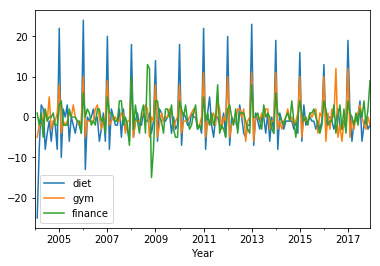

In [31]:
#Plot 1st order difference again, but for all 3 trends
df.diff().plot()
plt.xlabel('Year')
#Now we see lots of overlap b/w 'diet' and 'gym' - very correlated

In [32]:
#We can calkculate the corr coef of the first-order difference
df.diff().corr()
#Now we see positive correlation coef of 0.76 b/w gym and diet
#(only 0.37 b/w finance and diet, 0.3 b/w finance and gym)

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


In [ ]:
'''
AUTOCORRELATION
- x-axis: lag
- y-axis: how correlated the ts is w/ that lag

E.g., if ts repeats itself every 2 days, would expect a spike in autocorrelation at 2 days
    -> in this case, we expect a spike at 12 mos
'''

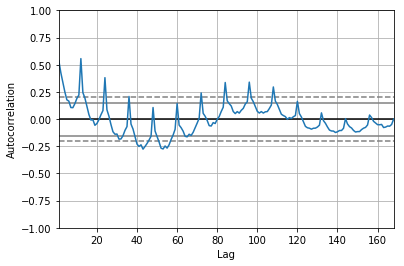

In [33]:
pd.plotting.autocorrelation_plot(diet)
#Shows that diet is autocorrelated w/ lag of 12 mos
# -> less autocorrelation over time 

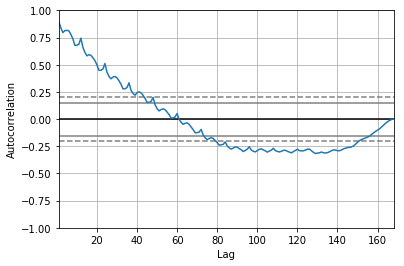

In [34]:
pd.plotting.autocorrelation_plot(gym)
#For gym, we see much less pronounced spikes

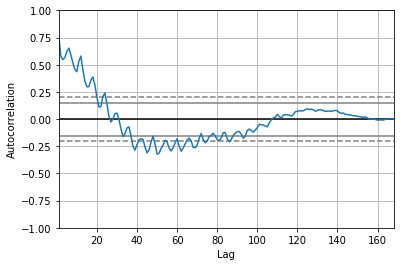

In [36]:
finance = df[['finance']]
pd.plotting.autocorrelation_plot(finance)